In [1]:
# https://github.com/youngmihuang/lyrics_application
# https://pypi.org/project/GoogleNews/

from GoogleNews import GoogleNews

import requests 
from bs4 import BeautifulSoup
import pandas as pd

googlenews = GoogleNews()

googlenews.setlang('cn')
googlenews.setperiod('d')
googlenews.setencode('utf-8')
googlenews.clear()


x = input("請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:")
googlenews.search(x)

alldata = googlenews.result()
result = googlenews.gettext()
links = googlenews.get__links()
# print(type(result))
# print(len(result))
# print(alldata)


print()

for n in range(len(result)):
#     print(n+1)
    print(result[n])
    print(links[n])
   

df = pd.DataFrame(
{
    '標題': result,
    '連結': links
})
 
df


請輸入要搜尋的關鍵字，將為你搜集相關字詞內容:新竹燈會

疫情擴大新竹燈會停辦？中央、地方不同調
https://newtalk.tw/news/view/2021-01-19/525337
桃園醫院群聚疫情擴大 台灣燈會停辦
https://www.cna.com.tw/news/firstnews/202101195003.aspx
【不斷更新】台中停辦中台灣燈會高雄取消尾牙團拜｜ 蘋果新聞網
https://tw.appledaily.com/life/20210119/7RTRIXAKGJH2DJ2ZBAZBA3EPYI/
疫情升高 鄭宏輝呼籲新竹燈會即刻取消
https://tw.news.yahoo.com/%E7%96%AB%E6%83%85%E5%8D%87%E9%AB%98-%E9%84%AD%E5%AE%8F%E8%BC%9D%E5%91%BC%E7%B1%B2%E6%96%B0%E7%AB%B9%E7%87%88%E6%9C%83%E5%8D%B3%E5%88%BB%E5%8F%96%E6%B6%88-070631936.html
台灣燈會擬取消？ 行政院下午說明
https://www.rti.org.tw/news/view/id/2089433
更新／台灣燈會停辦、國際書展照常舉行 全台大型活動異動懶人包
https://www.ettoday.net/news/20210119/1902328.htm
桃醫武肺群聚事件擴大政院宣布2021台灣燈會停辦
https://www.taiwanhot.net/?p=898026
台灣燈會不辦了？指揮中心強烈建議取消集會活動
https://www.chinatimes.com/realtimenews/20210119003849-260405
快新聞／疫情升溫台灣燈會恐取消？ 行政院下午3時召開記者會 ...
https://www.ftvnews.com.tw/news/detail/2021119W0076
醫護染疫群聚擴大 基隆停辦七堵煙火節
https://tw.news.yahoo.com/%E9%86%AB%E8%AD%B7%E6%9F%93%E7%96%AB%E7%BE%A4%E8%81%9A%E6%93%B4%E5%A4%A7-%E5%9F%BA%E9%9A%86%E5%81

,標題,連結
0,疫情擴大新竹燈會停辦？中央、地方不同調,https://newtalk.tw/news/view/2021-01-19/525337
1,桃園醫院群聚疫情擴大 台灣燈會停辦,https://www.cna.com.tw/news/firstnews/20210119...
2,【不斷更新】台中停辦中台灣燈會高雄取消尾牙團拜｜ 蘋果新聞網,https://tw.appledaily.com/life/20210119/7RTRIX...
3,疫情升高 鄭宏輝呼籲新竹燈會即刻取消,https://tw.news.yahoo.com/%E7%96%AB%E6%83%85%E...
4,台灣燈會擬取消？ 行政院下午說明,https://www.rti.org.tw/news/view/id/2089433
5,更新／台灣燈會停辦、國際書展照常舉行 全台大型活動異動懶人包,https://www.ettoday.net/news/20210119/1902328.htm
6,桃醫武肺群聚事件擴大政院宣布2021台灣燈會停辦,https://www.taiwanhot.net/?p=898026
7,台灣燈會不辦了？指揮中心強烈建議取消集會活動,https://www.chinatimes.com/realtimenews/202101...
8,快新聞／疫情升溫台灣燈會恐取消？ 行政院下午3時召開記者會 ...,https://www.ftvnews.com.tw/news/detail/2021119...
9,醫護染疫群聚擴大 基隆停辦七堵煙火節,https://tw.news.yahoo.com/%E9%86%AB%E8%AD%B7%E...


In [2]:

url = df['連結'][0]
print(url)


user_agent = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.111 Safari/537.36'}


r = requests.get(url, headers=user_agent)
r.encoding = "utf-8"
web_content = r.text
soup = BeautifulSoup(web_content,'html')


articleContent = soup.find_all('p')
# articleContent

article = []
for p in articleContent:
    article.append(p.text)


articleAll = '\n'.join(article)
# print(articleAll)

# 分段用

https://newtalk.tw/news/view/2021-01-19/525337


In [3]:

import jieba
jieba.load_userdict('dict.txt.big.txt')

d = articleAll.replace('[^\w\s]','').replace('／',"").replace('《','').replace('》','').replace('，','').replace('。','').replace('「','').replace('」','').replace('（','').replace('）','').replace('！','').replace('？','').replace('、','').replace('▲','').replace('…','').replace('：','')
# print(d)

jieba.setLogLevel(20)

# Sentence = jieba.cut(d, cut_all=True)
# print('全模式'+": "  + "/ ".join(Sentence) + '\n')   
 
# Sentence = jieba.cut(d, cut_all=False)
# print('精確模式'+": " + "/ ".join(Sentence)+ '\n')  
 
# Sentence = jieba.cut(d)  
# print('Default為精確模式'+": " + "/ ".join(Sentence)+ '\n')
 
Sentence = jieba.cut_for_search(d)  
print('搜索引擎模式'+": " + "/ ".join(Sentence)+ '\n')

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/2p/qz_90rqs1fx0_vgnt2xgf6yw0000gn/T/jieba.cache
Loading model cost 0.633 seconds.
Prefix dict has been built succesfully.


搜索引擎模式: 目前/ 設定/ 
/ 目前/ 設定/ 
/ 目前/ 設定/ 
/ 桃園/ 醫院/ 日前/ 發生/ 醫師/ 確診/ 造成/ 醫院/ 群聚/ 感染/ 讓/ 疫情/ 緊張/ 情勢/ 再度/ 上升/ 即將/ 在/ 2/ 月/ 26/ 日至/ 3/ 月/ 7/ 日於/ 新竹/ 竹市/ 新竹市/ 舉辦/ 的/ 台灣/ 燈會/ 也/ 怕/ 成為/ 防疫/ 破口/ 市府/ 表示/ 可能/ 停辦/ 不料/ 交通/ 部長/ 交通部/ 交通部長/ 佳龍/ 林佳龍/ 則持/ 不同/ 意見/ 認為/ 沒有/ 停辦/ 的/ 問題/ 是/ 要/ 看/ 怎麼/ 怎麼辦/ 中央/ 地方/ 完全/ 不同/ 同調/ 不同調/ 
/ 自/ 上週/ 桃園/ 醫院/ 爆發/ 群聚/ 感染/ 後/ 觀光/ 光局/ 觀光局/ 就/ 表示/ 早/ 在/ 去年/ 就/ 請/ 新竹/ 市府/ 研擬/ 防疫/ 應變/ 計畫/ 如果/ 後續/ 不幸/ 出現/ 社區/ 感染/ 一切/ 遵照/ 指揮/ 中心/ 規定/ 辦理/ 最/ 壞/ 打算/ 是/ 停辦/ 燈會/ 但/ 不/ 希望/ 發生/ 然而/ 佳龍/ 林佳龍/ 林佳龍昨/ 18/ 日/ 出席/ 疫後/ 觀光/ 轉型/ 論壇/ 時/ 受訪/ 卻/ 認為/ 沒有/ 停辦/ 的/ 問題/ 只是/ 要/ 看/ 如何/ 去辦/ 防疫/ 優先/ 但/ 也/ 要過/ 正常/ 生活/ 
/ 佳龍/ 林佳龍/ 指出/ 這/ 次/ 的/ 台灣/ 燈會/ 在/ 新竹/ 登場/ 是/ 屬/ 城市/ 城市型/ 燈會/ 又/ 是/ 開放/ 空曠/ 空間/ 對/ 疫情/ 發展/ 會/ 做/ 相應/ 檢視/ 跟/ 必要/ 調整/ 甚至/ 提出/ 更新/ 的/ 呈現/ 方法/ 目前/ 都/ 在/ 討論/ 中/ 他/ 強調/ 此/ 次/ 燈會/ 主題/ 乘風/ 逐光/ 象徵/ 告別/ 疫情/ 走向/ 光明/ 希望/ 相當/ 符合/ 現在/ 結合/ 防疫/ 的/ 目標/ 燈會/ 內容/ 如何/ 重新/ 檢視/ 或/ 修正/ 最近/ 也/ 密切/ 討論/ 評估/ 當中/ 若/ 有/ 一步/ 進一步/ 結果/ 會/ 對/ 外/ 公布/ 
/ 對/ 部長/ 抱持/ 不/ 停辦/ 的/ 想法/ 新竹/ 市長/ 林智/ 林智堅/ 則/ 有點/ 驚訝/ 他/ 指出/ 在/ 疫情/ 擴大/ 後/ 市民/

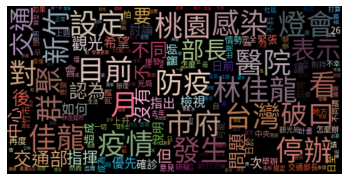

<Figure size 20000x20000 with 0 Axes>

In [6]:
import numpy as np

from PIL import Image

import matplotlib.pyplot as plt

from collections import Counter

from wordcloud import WordCloud, ImageColorGenerator

from scipy.ndimage import gaussian_gradient_magnitude



with open('stopword.txt','r',encoding="utf-8") as f:
    stops = f.read().split('\n')
    

Sentence = jieba.cut_for_search(d)    


terms = {}
for sentence in Sentence :
    if sentence in stops:
        continue
    
    if sentence in terms:
        terms[sentence] += 1
    else:
        terms[sentence] = 1  
        
        
# dicition = Counter(terms)
# print(Counter(terms))








        
# generate_from_text()方法會採納stopwords參數 也可使用

# https://coolors.co/palettes/popular





icon = "color"
icon_path = "%s.png" % icon


mask_color = np.array(Image.open(icon_path))
mask_color = mask_color[::3, ::3]
mask_image = mask_color.copy()
mask_image[mask_image.sum(axis=2) == 0] = 255


edges = np.mean([gaussian_gradient_magnitude(mask_color[:, :, i]/255., 2) for i in range(3)], axis=0)
mask_image[edges > .08] = 255






wc = WordCloud(font_path="/Users/larry/Library/Fonts/SourceHanSansTW-Regular.otf", 
               mask = mask_color,
               max_font_size=45, 
               max_words = 2000 ,        
               stopwords= stops,
                margin=1,
              relative_scaling=0)     

wc.generate_from_frequencies(terms)
 


image_colors = ImageColorGenerator(mask_color)
wc.recolor(color_func=image_colors)


# 視覺化

plt.imshow(wc , interpolation="bilinear")
plt.axis("off")
plt.figure(figsize=(50,50),dpi= 400)
plt.show()

# plt.savefig("asdfghjkl.png")
wc.to_file("img/demo06.png")


In [5]:

newsDf = pd.DataFrame.from_dict(terms, orient='index', columns = ['詞頻'])
newsDf.sort_values(by= ['詞頻'], ascending= False)

,詞頻
\n,8
燈會,8
停辦,7
防疫,6
新竹,5
...,...
然而,1
林佳龍昨,1
日,1
出席,1
